<a href="https://colab.research.google.com/github/Vamsi-Malineni/CS5691_Machine_Learning_Models/blob/main/Regression/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math



In [5]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Assignment1 datasets/function2_2d.csv",delimiter=',')

X_dataset = dataset[["x1","x2"]]
Y_dataset = dataset["y"]

range_min_x1 = math.floor(min(X_dataset["x1"]))
range_max_x1 = math.ceil(max(X_dataset["x1"]))
range_min_x2 = math.floor(min(X_dataset["x2"]))
range_max_x2 = math.ceil(max(X_dataset["x2"]))

x_train = X_dataset[:math.floor(0.7*len(X_dataset))]
y_train = Y_dataset[:math.floor(0.7*len(X_dataset))]

x_valid = X_dataset[math.floor(0.7*len(X_dataset)): math.floor(0.8*len(X_dataset))]
y_valid = Y_dataset[math.floor(0.7*len(X_dataset)): math.floor(0.8*len(X_dataset))]

x_test = X_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]
y_test = Y_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]

degree = 2
training_size = [50,200,500]
M = [2,3,6]



# Polygonal Basis Function

In [6]:
# generating and returning the Phi matrix 
# inputs : model complexity, size of the training data, Dimension of Phi matrix, training data, offset used to access elements for test and validation data
def phi_generate(M0,N,D,x_train,offset):
    phi_x1 = np.zeros((N,M0))
    phi_x2 = np.zeros((N,M0))
    for i in range(N):
        for j in range(M0):
            phi_x1[i][j] = x_train["x1"][i+offset]**j
            phi_x2[i][j] = x_train["x2"][i+offset]**j
    Phi = np.zeros((N,D))
    for i in range(N):
        A = np.outer(phi_x1[i],phi_x2[i])
        l=0
        for j in range(M0):
            for k in range(M0-j):
                Phi[i][l] = A[j][k]
                l+=1
    return Phi


In [7]:
# plotting the estimated 2D function surface and the training points used 
# inputs : training data, target output of the training data, Dimension of Phi matrix, Model complexity, model parameters 
def plot_3Dsurface(x_train,y_train,D,M0,w):
    points = 100
    x1 = np.linspace(range_min_x1,range_max_x1,points)
    x2 = np.linspace(range_min_x2,range_max_x2,points)
    x1,x2 = np.meshgrid(x1,x2)
    x1 = np.arange(range_min_x1,range_max_x1,0.1)
    x2 = x1
    x1,x2 = np.meshgrid(x1,x2)

    phi_x1 = np.zeros(D)
    phi_x2 = np.zeros(D)
    l = 0
    for j in range(M0):
        for k in range(M0-j):
            phi_x1[l] = j
            phi_x2[l] = k
            l+=1
    f_x1_x2 = 0
    for i in range(D):
        f_x1_x2 += (x1**phi_x1[i])*(x2**phi_x2[i])*w[i]

    fig = plt.figure(figsize = (10, 7)) 
    ax = fig.gca(projection ='3d') 
    ax.scatter3D(x_train["x1"], x_train["x2"], y_train, color = "red") 
    ax.plot_surface(x1, x2, f_x1_x2, cmap = "bone", alpha=0.75)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("output")
    plt.show()

In [8]:
# returns the Root mean squared error (ERMS) between the train, validation and test data and their predictions made by our model
# inputs : Dimension, size of training data, features of training data, target output of training data, regularization coefficient lamda 
def erms_error(M0,N,x_train,y_train,lamda):
    # calculating D from M0 and degree
    D = int(math.factorial(M0 + degree)/((math.factorial(M0))*(math.factorial(degree))))
    I = np.identity(D)
    Phi = phi_generate(M0+1,N,D,x_train,0)

    # calculating optimal model parameters w 
    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose()).dot(y_train)

    print("\nPlot for training data size : "+str(N)+", and model complexity :"+str(M0))
    plot_3Dsurface(x_train,y_train,D,M0+1,w)    
    
    # generate the model output for training data
    print("\nScatter plot of training data for training data size : "+str(N)+", and model complexity :"+str(M0))
    predicted = Phi.dot(w)
    plt.scatter(y_train, predicted, color = "blue")
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show() 
    
    error_train = 0
    for i in range(len(y_train)):
        error_train += (predicted[i]-y_train[i])**2
    
    error_train /= len(y_train)
    
    # generate the model output for test data
    print("\nScatter plot of test data for training data size : "+str(N)+", and model complexity :"+str(M0))
    predicted = phi_generate(M0+1,len(x_test),D,x_test,math.floor(0.8*len(X_dataset))).dot(w)    
    plt.scatter(y_test, predicted,color = "red")
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show()   
    
    error_test = 0
    for i in range(len(y_test)):
        error_test += (predicted[i]-y_test[i+math.floor(0.8*len(X_dataset))])**2
    
    error_test /= len(y_test)

    # generate the model output for validation data
    predicted = phi_generate(M0+1,len(x_valid),D,x_valid,math.floor(0.7*len(X_dataset))).dot(w)
    
    error_valid = 0
    for i in range(len(y_valid)):
        error_valid += (predicted[i]-y_valid[i+math.floor(0.7*len(X_dataset))])**2
    
    error_valid /= len(y_valid)
    return math.sqrt(error_train),math.sqrt(error_valid),math.sqrt(error_test)


Plot for training data size : 50, and model complexity :2


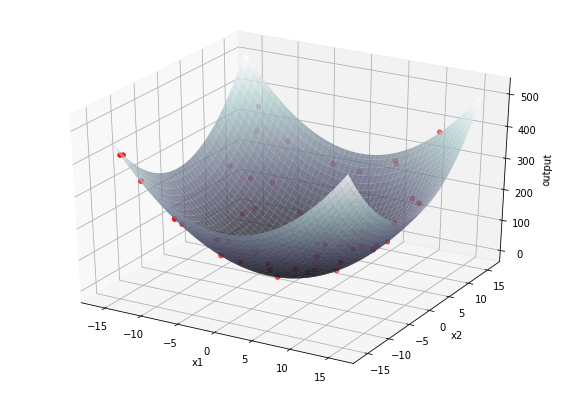


Scatter plot of training data for training data size : 50, and model complexity :2


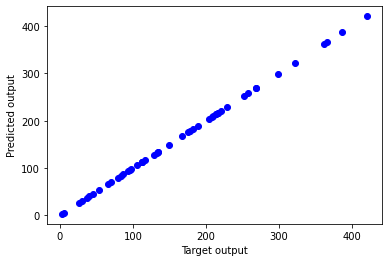


Scatter plot of test data for training data size : 50, and model complexity :2


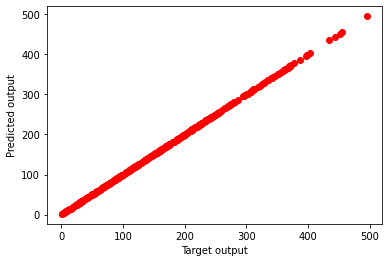


Plot for training data size : 50, and model complexity :3


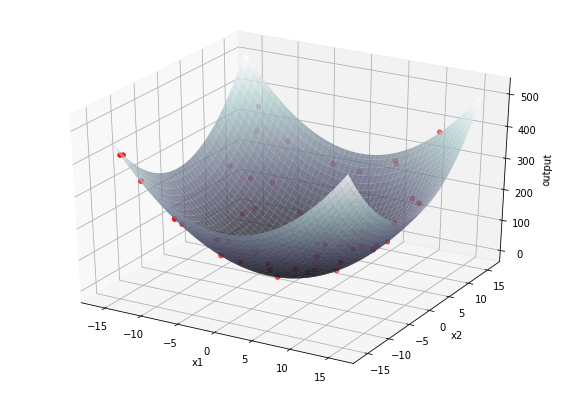


Scatter plot of training data for training data size : 50, and model complexity :3


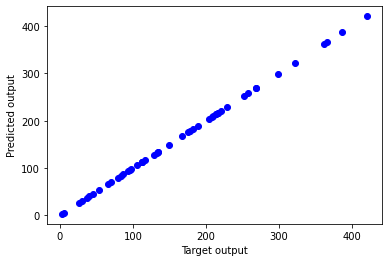


Scatter plot of test data for training data size : 50, and model complexity :3


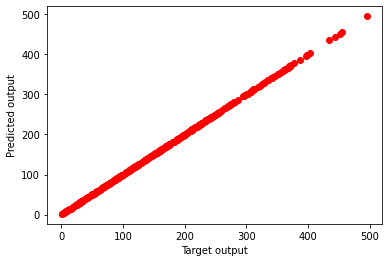


Plot for training data size : 50, and model complexity :6


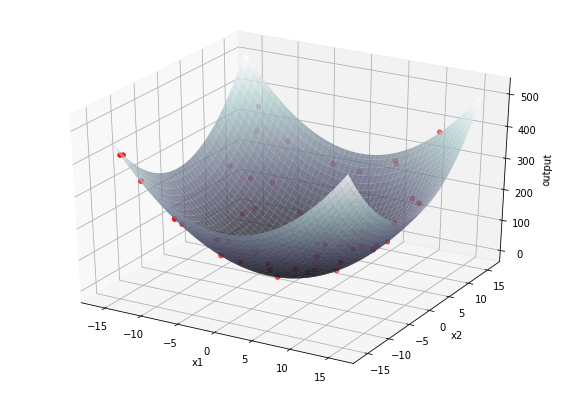


Scatter plot of training data for training data size : 50, and model complexity :6


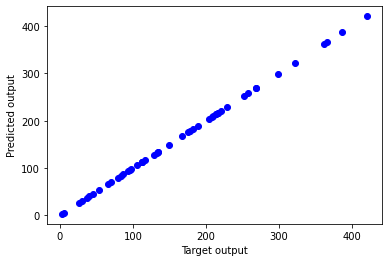


Scatter plot of test data for training data size : 50, and model complexity :6


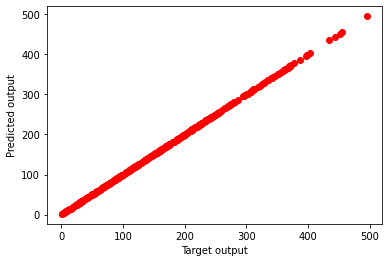


Plot for training data size : 200, and model complexity :2


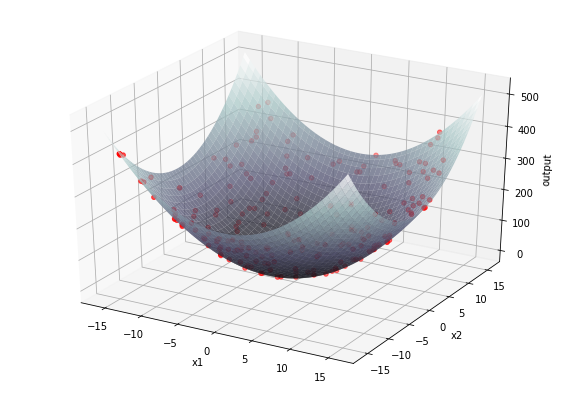


Scatter plot of training data for training data size : 200, and model complexity :2


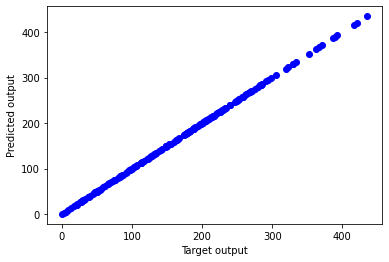


Scatter plot of test data for training data size : 200, and model complexity :2


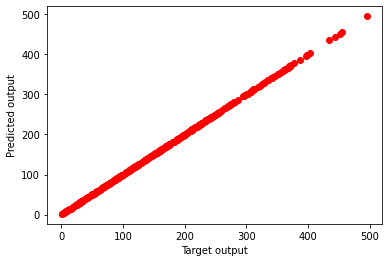


Plot for training data size : 200, and model complexity :3


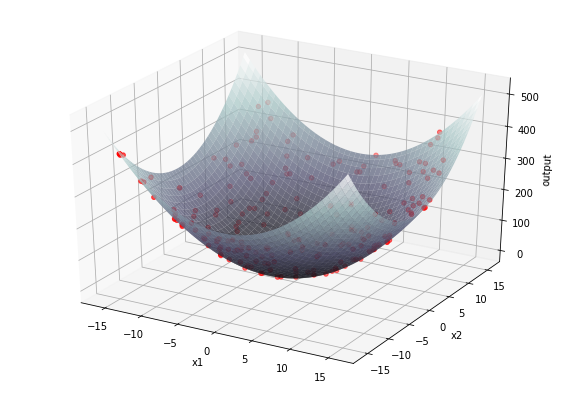


Scatter plot of training data for training data size : 200, and model complexity :3


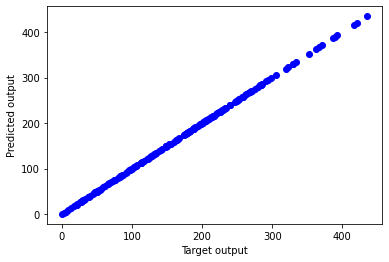


Scatter plot of test data for training data size : 200, and model complexity :3


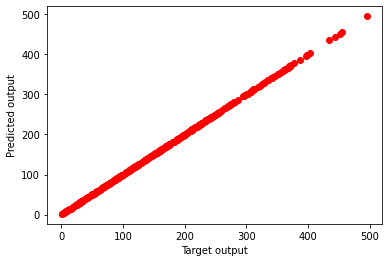


Plot for training data size : 200, and model complexity :6


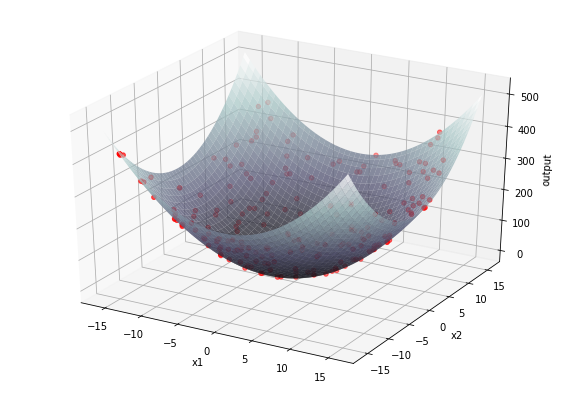


Scatter plot of training data for training data size : 200, and model complexity :6


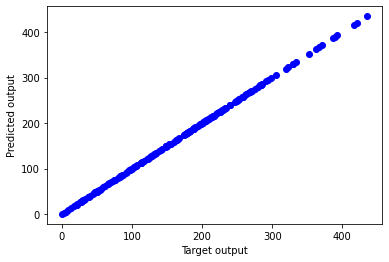


Scatter plot of test data for training data size : 200, and model complexity :6


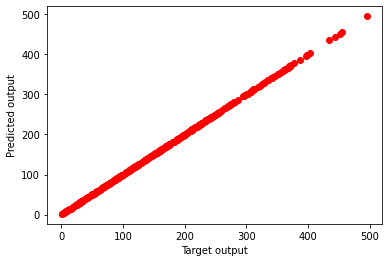


Plot for training data size : 500, and model complexity :2


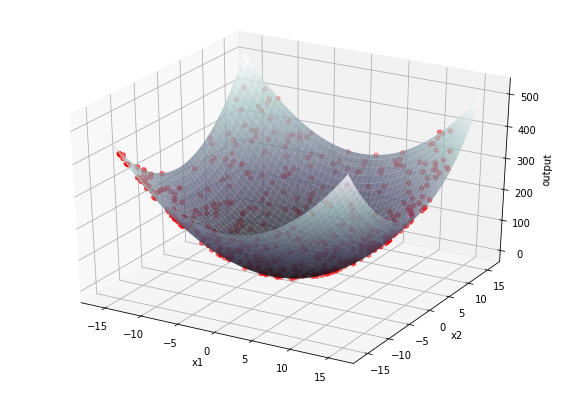


Scatter plot of training data for training data size : 500, and model complexity :2


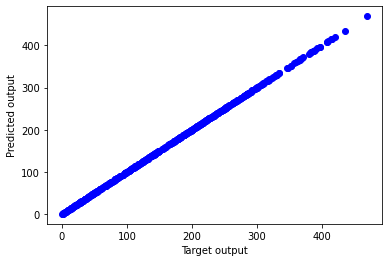


Scatter plot of test data for training data size : 500, and model complexity :2


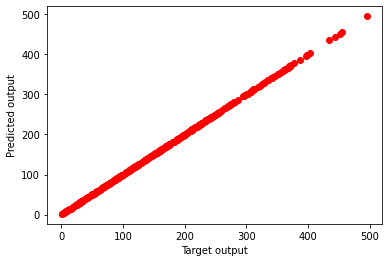


Plot for training data size : 500, and model complexity :3


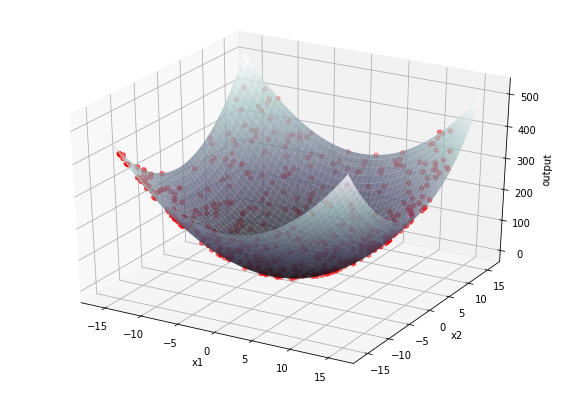


Scatter plot of training data for training data size : 500, and model complexity :3


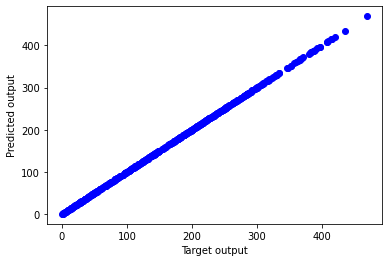


Scatter plot of test data for training data size : 500, and model complexity :3


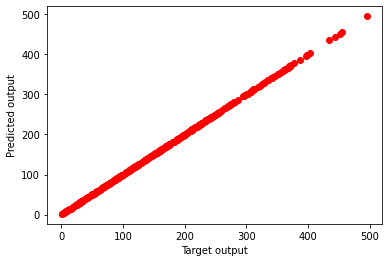


Plot for training data size : 500, and model complexity :6


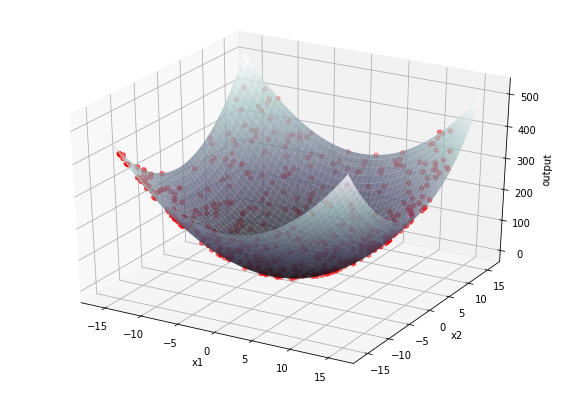


Scatter plot of training data for training data size : 500, and model complexity :6


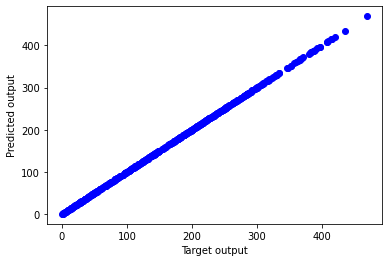


Scatter plot of test data for training data size : 500, and model complexity :6


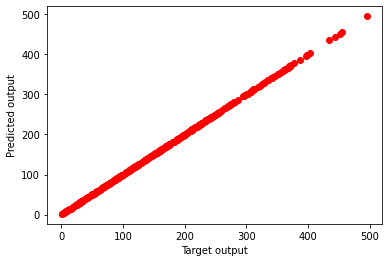

In [9]:
# regularization coefficient (keep 0 until overfitting is observed)
lamda = 0

# array to store errors for different training data sizes and different model complexities
error_train = np.zeros((len(training_size),len(M)))
error_test = np.zeros((len(training_size),len(M)))
error_valid = np.zeros((len(training_size),len(M)))
for i in range(len(training_size)):
    # using only training_size[i] elements for training
    x_train = X_dataset[:training_size[i]]
    y_train = Y_dataset[:training_size[i]]
    for j in range(len(M)):
        # building a model of complexity M[j]
        error_train[i][j], error_valid[i][j], error_test[i][j] = erms_error(M[j],training_size[i],x_train,y_train,lamda)


Train data :
Plot of ERMS with training size 50 :


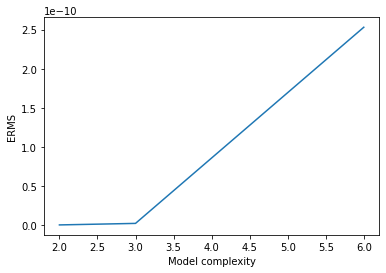

Plot of ERMS with training size 200 :


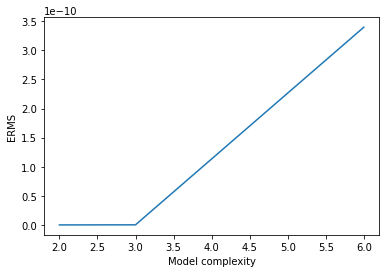

Plot of ERMS with training size 500 :


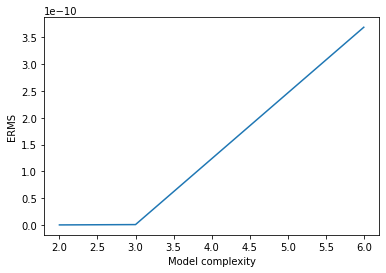


Validation data :
Plot of ERMS with training size 50 :


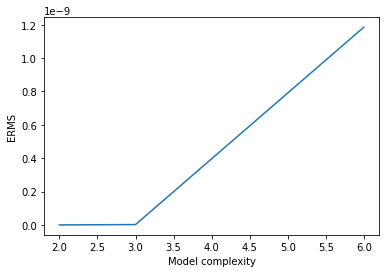

Plot of ERMS with training size 200 :


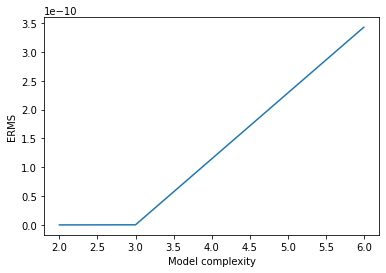

Plot of ERMS with training size 500 :


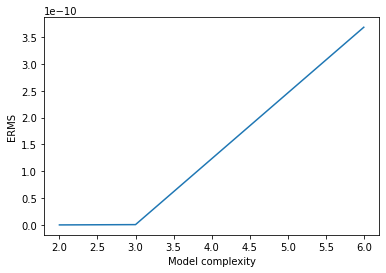


Test data :
Plot of ERMS with training size 50 :


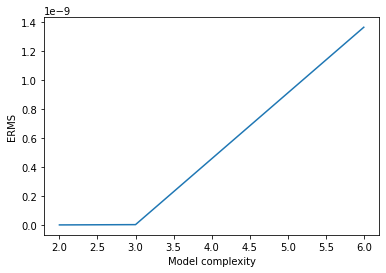

Plot of ERMS with training size 200 :


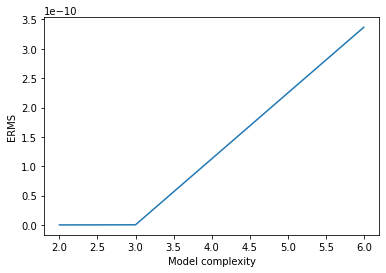

Plot of ERMS with training size 500 :


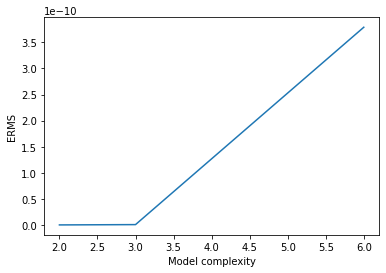

In [10]:
print("\nTrain data :")
for i in range(len(training_size)):  
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")  
    plt.plot(M,error_train[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()
print("\nValidation data :")
for i in range(len(training_size)): 
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")     
    plt.plot(M,error_valid[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()
print("\nTest data :")
for i in range(len(training_size)): 
    print("Plot of ERMS with training size " +str(training_size[i]) +" :")     
    plt.plot(M,error_test[i])
    plt.xlabel("Model complexity")
    plt.ylabel("ERMS")
    plt.show()

# Gaussian Basis Function

In [11]:
# generates the gaussian basis function for the training data and the centers of the clusters 
# input : training data features, cluster centre features, sigma square (variance of the features), no. of clusters
def gaussian_Basis(x_train,mean,sigma_square,k):
    Phi = np.zeros((k,len(x_train)))
    for i in range(k):
        Phi[i] = math.e**(-((x_train["x1"]-mean[i][0])**2+(x_train["x2"]-mean[i][1])**2)/sigma_square)
    return Phi.transpose()

In [12]:
# generates the Phi_tilde matrix required during Tikhonov regularization
# inputs : cluster centres, variance of the features, no. of clusters, no. of features
def generatePhi_tilde(mean,sigma_square,k,degree):    
    Phi_tilde = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            for l in range(degree):
                Phi_tilde[i][j] += (mean[i][l]-mean[j][l])**2
    return math.e**(Phi_tilde*(-1)/sigma_square)

In [13]:
# returns the ERMS for the train, valid and test data using gaussian basis function to predict the function output
# training data features, training data target output, regularization coefficient, cluster centres, variance, no. of clusters  
def erms_error_gaussian(x_train,y_train,lamda,mean,sigma_square,k):
    Phi = gaussian_Basis(x_train,mean,sigma_square,k)
    I = generatePhi_tilde(mean,sigma_square,k,degree)
    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose().dot(y_train))

    # generate the model output for training data
    print("\nScatter plot of train data for "+str(k)+" clusters of gaussian basis function")
    predicted = Phi.dot(w)
    plt.scatter(y_train, predicted, color = "blue")
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show() 

    error_train = 0
    for i in range(len(y_train)):
        error_train += (predicted[i]-y_train[i])**2

    error_train /= len(y_train)
    
    # generate the model output for validation data
    predicted = gaussian_Basis(x_valid,mean,sigma_square,k).dot(w)

    error_valid = 0
    for i in range(len(y_valid)):
        error_valid += (predicted[i]-y_valid[i+math.floor(0.7*len(X_dataset))])**2
        
    error_valid /= len(y_valid)  
    
    # generate the model output for test data
    print("\nScatter plot of test data for "+str(k)+" clusters of gaussian basis function")
    predicted = gaussian_Basis(x_test,mean,sigma_square,k).dot(w)
    plt.scatter(y_test, predicted, color = "red")
    plt.xlabel("Target output")
    plt.ylabel("Predicted output")
    plt.show() 

    error_test = 0
    for i in range(len(y_test)):
        error_test += (predicted[i]-y_test[i+math.floor(0.8*len(X_dataset))])**2

    error_test /= len(y_test)
    return math.sqrt(error_train),math.sqrt(error_valid),math.sqrt(error_test)

In [14]:
# returns the euclidian distance between 2 points 
# inputs : takes 2 points
def Euclidean_distance(data1,data2):
    return math.sqrt(sum((data1-data2)**2))

In [15]:
# assign a training example to a cluster depending upon the euclidean distance from the cluster centre
# inputs : cluster centres, training example, no. of clusters
def assignCluster(mean,data,k):
    z = np.zeros((len(data),k))
    for i in range(len(data)):
        closest = Euclidean_distance([data["x1"][i],data["x2"][i]],mean[0])**2
        z[i][0] = 1
        for j in range(len(mean)):
            dist = Euclidean_distance([data["x1"][i],data["x2"][i]],mean[j])**2
            if(dist < closest):
                closest = dist
                z[i] = np.zeros(k)
                z[i][j] = 1
    return z

In [16]:
# update the mean of the clusters
# inputs : cluster assignment, train data, no. of clusters
def updateMean(z,data,k):
    mean = np.zeros((k,degree))
    N = sum(z)
    for i in range(k):
        for j in range(len(data)):
            mean[i][0]+=data["x1"][j]*z[j][i]
            mean[i][1]+=data["x2"][j]*z[j][i]
        mean[i]/=N[i]
    return mean

In [17]:
# K means clustering to find k clusters
# inputs : no. of clusters, train data, max no, of iterations
def KmeansClustering(k,data,iteration):
    mean = np.zeros((k,degree))

    # random initialization
    mean_index_initial = np.random.choice(len(data),k)
    for i in range(k):
        mean[i][0] = data["x1"][mean_index_initial[i]]
        mean[i][1] = data["x2"][mean_index_initial[i]]

    z_old = assignCluster(mean,data,k)

    # updating the mean and assigning the clusters again
    for i in range(iteration):
        mean = updateMean(z_old,data,k)
        z_new = assignCluster(mean,data,k)
        if np.allclose(z_new,z_old):
            return mean
        z_old = z_new
    return mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.



Scatter plot of train data for 24 clusters of gaussian basis function


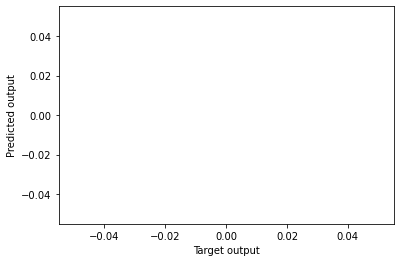


Scatter plot of test data for 24 clusters of gaussian basis function


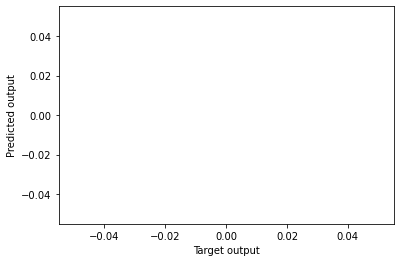


 ERMS of the training data : nan

 ERMS of the validation data : nan

 ERMS of the testing data : nan


In [18]:
# variance in features
sigma_square = 400

# no. of clusters
k = 24

# regularisation coefficient
lamda_th = 0

# finding the K clusters
mean = KmeansClustering(k,x_train,100)

error_train,error_valid,error_test = erms_error_gaussian(x_train,y_train,lamda_th,mean,sigma_square,k)

print("\n ERMS of the training data : "+str(error_train))
print("\n ERMS of the validation data : "+str(error_valid))
print("\n ERMS of the testing data : "+str(error_test))